In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import dlib,cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
ls 'drive/MyDrive/facial_landmark/code9/Vision/OpenCV/3OpenCVwithFace/pre_trained/68_face_landmarks.dat'

drive/MyDrive/facial_landmark/code9/Vision/OpenCV/3OpenCVwithFace/pre_trained/68_face_landmarks.dat


In [4]:
# Landmark model location
PREDICTOR_PATH = "drive/MyDrive/facial_landmark/code9/Vision/OpenCV/3OpenCVwithFace/pre_trained/68_face_landmarks.dat"

In [5]:
# Get the face detector
faceDetector = dlib.get_frontal_face_detector()

In [6]:
ls 'drive/MyDrive/facial_landmark/code9/Vision/OpenCV/3OpenCVwithFace/images'

A1.jpg  kjs.jpg  real.jpg


In [7]:
ls 'drive/MyDrive/facial_landmark/code9/Vision/OpenCV/3OpenCVwithFace/results'

result_0.txt   result1_1.txt  result1_3.txt  result_1.txt  result_3.txt
result1_0.txt  result1_2.txt  result1_4.txt  result_2.txt  result_4.txt


In [8]:
# The landmark detector is implemented in the shape_predictor class
landmarkDetector = dlib.shape_predictor(PREDICTOR_PATH)

# Read image
imageFilename = "drive/MyDrive/facial_landmark/code9/Vision/OpenCV/3OpenCVwithFace/images/A1.jpg"
im= cv2.imread(imageFilename)
origin = im.copy()

# landmarks will be stored in results/result_i.txt
landmarksBasename = "drive/MyDrive/facial_landmark/code9/Vision/OpenCV/3OpenCVwithFace/results/result1"

In [9]:
# Detect faces in the image
faceRects = faceDetector(im, 2)
print("Number of faces detected: ", len(faceRects))

Number of faces detected:  3


## renderFace.py



    cv2.polylines(img, array of points in int32 format, bool isClosed, color, lineThickness, lineType)

In [10]:
# code 디렉토리 내 renderFace.py 내용
def drawPolyline(im, landmarks, start, end, isClosed=False, Color = (255, 100, 0)):
    points = []
    for i in range(start, end+1):
        point = [landmarks.part(i).x, landmarks.part(i).y]
        points.append(point)

    points = np.array(points, dtype=np.int32)
    cv2.polylines(im, [points], isClosed, Color, thickness=2, lineType=cv2.LINE_8)

In [11]:
def renderFace(im, landmarks, Color= (255, 100, 0)):
    assert(landmarks.num_parts == 68)
    drawPolyline(im, landmarks, 0, 16)           # Jaw line
    drawPolyline(im, landmarks, 17, 21)          # Left eyebrow
    drawPolyline(im, landmarks, 22, 26)          # Right eyebrow
    drawPolyline(im, landmarks, 27, 30)          # Nose bridge
    drawPolyline(im, landmarks, 30, 35, True)    # Lower nose
    drawPolyline(im, landmarks, 36, 41, True)    # Left eye
    drawPolyline(im, landmarks, 42, 47, True)    # Right Eye
    drawPolyline(im, landmarks, 48, 59, True)    # Outer lip
    drawPolyline(im, landmarks, 60, 67, True)    # Inner lip

In [12]:
# Use this function for any model other than
# 70 points facial_landmark detector model
def renderFace2(im, landmarks, color=(0, 255, 0), radius=3):
    for p in landmarks.parts():
        cv2.circle(im, (p.x, p.y), radius, color, -1)

## writeLandmarksToFile


In [13]:
def writeLandmarksToFile(landmarks, landmarksFileName):
    with open(landmarksFileName, 'w') as f:
        for p in landmarks.parts():
            f.write("%s %s\n" %(int(p.x),int(p.y))) 
    f.close()

## Landmark Detection

In [14]:
# Loop over all detected face rectangles
Color = (255, 100, 0)

# List to store landmarks of all detected faces
landmarksAll = []

for i in range(0, len(faceRects)):
    newRect = dlib.rectangle(int(faceRects[i].left()),int(faceRects[i].top()),
        int(faceRects[i].right()),int(faceRects[i].bottom()))
    # For every face rectangle, run landmarkDetector
    landmarks = landmarkDetector(im, newRect)
    # Print number of landmarks
    if i==0:
        print("Number of landmarks",len(landmarks.parts()))

    # Store landmarks for current face
    landmarksAll.append(landmarks)
    # Draw landmarks on face
    renderFace(im, landmarks)
    landmarksFileName = landmarksBasename +"_"+ str(i)+ ".txt"
    print("Saving landmarks to", landmarksFileName)
    # Write landmarks to disk
    writeLandmarksToFile(landmarks, landmarksFileName)
    outputFileName = "results/realLandmark.jpg"
    print("Saving output image to", outputFileName)

Number of landmarks 68
Saving landmarks to drive/MyDrive/facial_landmark/code9/Vision/OpenCV/3OpenCVwithFace/results/result1_0.txt
Saving output image to results/realLandmark.jpg
Saving landmarks to drive/MyDrive/facial_landmark/code9/Vision/OpenCV/3OpenCVwithFace/results/result1_1.txt
Saving output image to results/realLandmark.jpg
Saving landmarks to drive/MyDrive/facial_landmark/code9/Vision/OpenCV/3OpenCVwithFace/results/result1_2.txt
Saving output image to results/realLandmark.jpg


In [15]:
# Convert BGR to RGB in order to use matplotlib
origin = cv2.cvtColor(origin, cv2.COLOR_BGR2RGB)
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

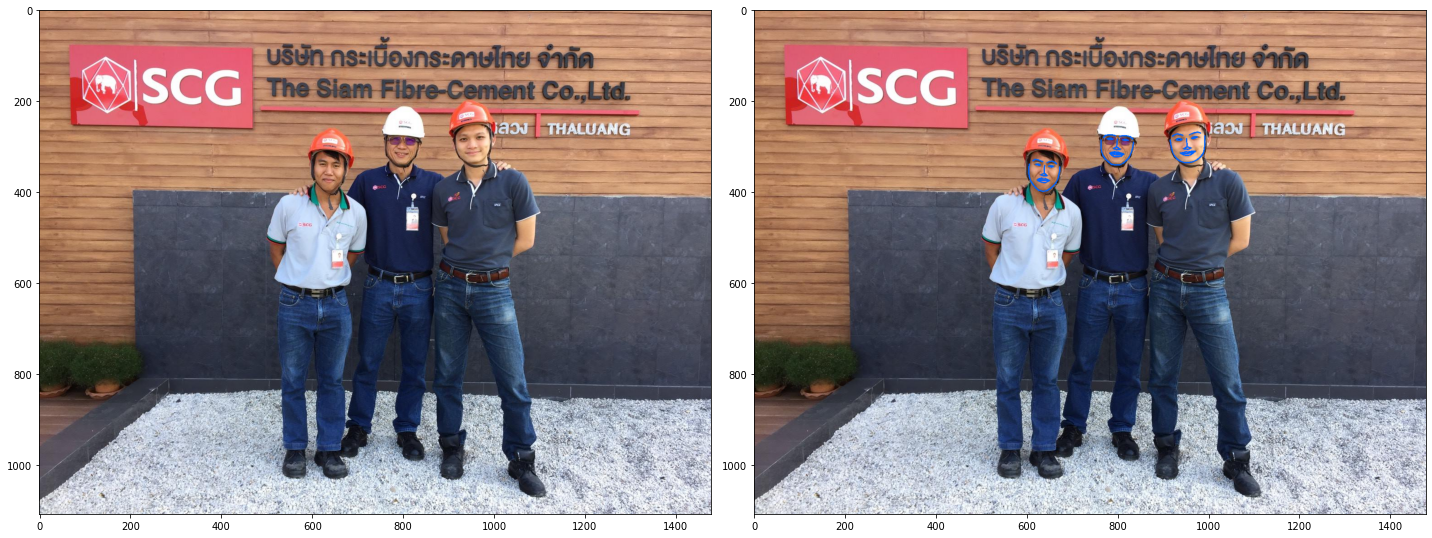

In [16]:
f, ax = plt.subplots(1, 2, figsize=(20, 15))
plt.subplot(121)
plt.imshow(origin)
plt.subplot(122)
plt.imshow(im)
plt.tight_layout()
plt.show()